# Assignment 8: Correlation Analysis and Hypothesis Testing

## Objective

The field of statistics is divided into two major parts: descriptive and inferential. In this assignment, we will cover two important topics in statistics: correlation analysis and hypothesis testing, where the former belongs to the descriptive part and the latter belongs to the inferential part. After this assignment, you will be able to answer the following questions:

**Correlation Analysis**
1. How to visualize the relationship between two variables?  
2. What is Pearson's correlation? How to compute it?
3. What is Spearman's rank correlation? How to compute it?
4. What's the difference between Pearson's correlation and Spearman's rank correlation? 


**Hypothesis Testing**
1. Why A/B testing?  
2. What is a permutation test? How to implement it?
3. What is p-value? How to avoid p-hacking? 
4. What is a chi-squared test? How to implement it?


In this assignment, you can use [pandas](https://pandas.pydata.org/) or PySpark to manipulate data, and use [matplotlib](https://matplotlib.org/) or [seaborn](seaborn.pydata.org) to make plots. 

## Part 1. Correlation Analysis

As a data scientist, you often face this kind of question: "Are A and B correlated?" For example, 

* Do Canadian Currency and Oil Price move together?
* Do Vancouver Housing Price and US Stock Market have any correlation?
* Are GPA and Gender independent? 

To answer these questions, you need to conduct correlation analysis. 

Imagine you are a data scientist working at a real-estate company. You download a dataset from [property_tax_report_2018.zip](property_tax_report_2018.zip). The dataset contains information on properties from BC Assessment (BCA) and City sources in 2018.  You can find the schema information of the dataset from this [webpage](http://data.vancouver.ca/datacatalogue/propertyTaxAttributes.htm). 

You may think that for a newly built house, it tends to have a higher price than the ones built decades ago. In this assignment, your first job is to figure out whether YEAR_BUILT and HOUSE_PRICE are correlated. 

We first load the data as a DataFrame. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("property_tax_report_2018.csv")
df.head(3)

,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONE_NAME,ZONE_CATEGORY,LOT,BLOCK,PLAN,DISTRICT_LOT,...,NARRATIVE_LEGAL_LINE5,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE
0,025-734-601,STRATA,7.500400e+11,75004024,C-2,Commercial,25,NaN,BCS498,2027,...,NaN,592000,242000,2018,472000.0,238000.0,2003.0,2003.0,NaN,3
1,029-700-868,STRATA,6.381830e+11,63818250,CD-1 (464),Comprehensive Development,132,NaN,EPS2983,200A,...,T OF THE STRATA LOT AS SHOWN ON FOR,715000,327000,2018,603000.0,329000.0,NaN,NaN,NaN,13
2,029-814-227,STRATA,1.708260e+11,17082596,CD-1 (535),Comprehensive Development,25,NaN,EPS3173,311,...,TITLEMENT OF THE STRATA LOT AS SHOW,507000,273000,2018,416000.0,273000.0,NaN,NaN,NaN,12


In [3]:
df['HOUSE_PRICE'] = df.apply(lambda x: (x['CURRENT_LAND_VALUE']+x['CURRENT_IMPROVEMENT_VALUE'])/1000000.0, axis = 1)
df.head(6)

,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONE_NAME,ZONE_CATEGORY,LOT,BLOCK,PLAN,DISTRICT_LOT,...,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,HOUSE_PRICE
0,025-734-601,STRATA,7.500400e+11,75004024,C-2,Commercial,25,NaN,BCS498,2027,...,592000,242000,2018,472000.0,238000.0,2003.0,2003.0,NaN,3,0.834
1,029-700-868,STRATA,6.381830e+11,63818250,CD-1 (464),Comprehensive Development,132,NaN,EPS2983,200A,...,715000,327000,2018,603000.0,329000.0,NaN,NaN,NaN,13,1.042
2,029-814-227,STRATA,1.708260e+11,17082596,CD-1 (535),Comprehensive Development,25,NaN,EPS3173,311,...,507000,273000,2018,416000.0,273000.0,NaN,NaN,NaN,12,0.780
3,029-918-731,STRATA,6.401940e+11,64019406,IC-3,Light Industrial,40,26,EPS2425,200A,...,227000,170000,2018,168000.0,170000.0,NaN,NaN,NaN,13,0.397
4,017-393-400,STRATA,6.011150e+11,60111496,CD-1 (233),Comprehensive Development,7,NaN,LMS75,185,...,801000,380000,2018,531000.0,385000.0,1991.0,1991.0,NaN,27,1.181
5,028-445-864,STRATA,6.051200e+11,60511984,CD-1 (444),Comprehensive Development,114,NaN,BCS4016,185,...,778000,383000,2018,674000.0,387000.0,2011.0,2011.0,NaN,27,1.161


### Task A. Visualizations

Since the housing price varies a lot by locations, we will only consider the houses whose <font color='blue'>postcode starts with 'V6A'</font>. Furthermore, we remove the houses that were <font color='blue'>built before 1900</font>.

<img src="img/v6a.png", width=500/>

In the following, please make two subplots in one row. For the left subplot, it is a scatter plot with X = `YEAR_BUILT` and Y = `HOUSE_PRICE`; for the right subplot, it is a hexbin plot (gridsize = 20) with X = `YEAR_BUILT` and Y = `HOUSE_PRICE`.

In [4]:
df['postal_code']=df['PROPERTY_POSTAL_CODE'].apply(lambda x: str(x).split(" ")[0]) #use the first three characters to represent an area.

In [5]:
dff = df[df['postal_code'] =='V6A']

In [6]:
l=dff['YEAR_BUILT'] >= 1900.0
nol = dff[l].isnull().sum()#We first check whether the YEAR_BUILT column has any missing value.
d1= dff[l]
d1

,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONE_NAME,ZONE_CATEGORY,LOT,BLOCK,PLAN,DISTRICT_LOT,...,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,HOUSE_PRICE,postal_code
577,009-785-931,STRATA,5.922120e+11,59221204,RT-3,Two Family Dwelling,3,NaN,VAS2071,181,...,131000,2018,1004000.0,135000.0,1987.0,1987.0,NaN,13,1.1770,V6A
612,004-207-882,LAND,1.905790e+11,19057935,DEOD,Comprehensive Development,4,3,VAP184,196,...,713000,2018,1124000.0,552400.0,1908.0,1908.0,NaN,26,1.9420,V6A
745,003-879-607,STRATA,5.941980e+11,59419848,RT-3,Two Family Dwelling,C,NaN,VAS328,196,...,68600,2018,584000.0,74500.0,1975.0,1975.0,NaN,13,0.7586,V6A
774,011-906-219,LAND,5.802060e+11,58020574,M-2,Industrial,15,51,VAP196,181,...,4500,2018,1066000.0,4500.0,1978.0,1978.0,NaN,13,1.4325,V6A
778,008-013-225,LAND,5.981990e+11,59819870,RT-3,Two Family Dwelling,15,101,VAP196,196,...,116000,2018,1349000.0,121000.0,1905.0,1965.0,NaN,13,1.6090,V6A
781,016-815-866,STRATA,6.002130e+11,60021259,RT-3,Two Family Dwelling,2,NaN,VAS2812,181,...,90300,2018,700000.0,105000.0,1991.0,1991.0,NaN,13,0.8483,V6A
782,009-189-254,LAND,6.002200e+11,60021991,I-2,Light Industrial,C,96,11549,181,...,6800,2018,2790000.0,6800.0,1993.0,1993.0,NaN,13,3.7788,V6A
784,028-843-355,STRATA,5.982130e+11,59821295,RT-3,Two Family Dwelling,2,93,EPS650,181,...,340000,2018,968000.0,337000.0,1910.0,2000.0,NaN,13,1.3680,V6A
789,007-608-454,LAND,5.892170e+11,58921728,M-2,Industrial,I,62,VAP196,181,...,21900,2018,3023000.0,21900.0,1980.0,1980.0,NaN,13,4.0709,V6A
790,015-567-265,LAND,5.942120e+11,59421206,RT-3,Two Family Dwelling,2,82,VAP196,181,...,11200,2018,2478000.0,11200.0,1907.0,1935.0,NaN,13,2.7722,V6A


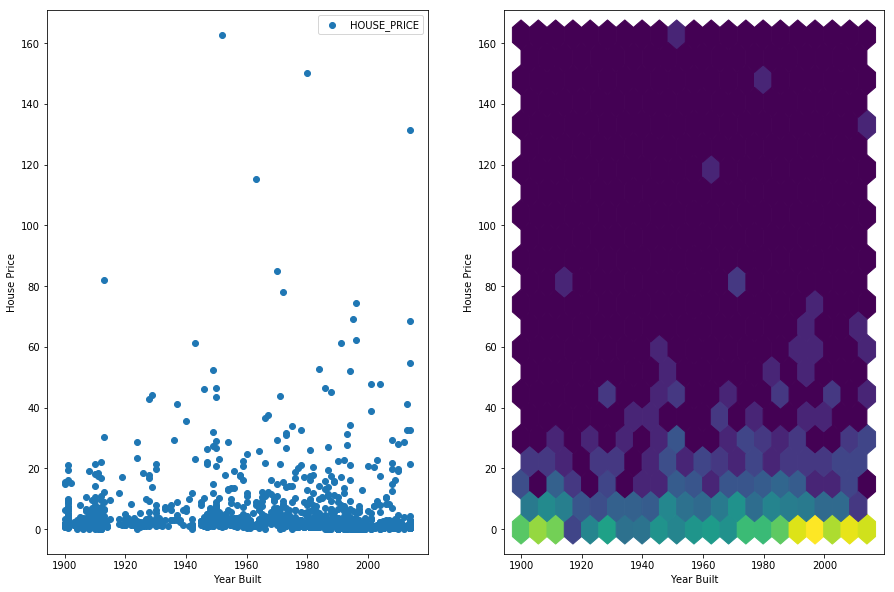

In [7]:
from scipy.stats import norm
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)

plt.scatter(d1['YEAR_BUILT'],d1['HOUSE_PRICE'])
plt.xlabel("Year Built")
plt.ylabel("House Price")
plt.legend()

plt.subplot(1,2,2)
plt.hexbin(d1['YEAR_BUILT'], d1['HOUSE_PRICE'],gridsize=20,bins='log')
plt.xlabel("Year Built")
plt.ylabel("House Price")
#plt.legend()

plt.show()


Please write down the **two** most interesting findings that you draw from the plot.

**Findings**
1. House prices and year built are not correlated to each other to each other. However since 1900 most house prices varies from 0 to 20M. There are few houses whoes prices were over 60M. In the hexbin plot lighter colors represent more number of houses,
2. In the hexbin plot it's much easier to see that more houses were concentrated where there is lighter colors(yellow) represented. That is from 1990 till 2016 and prices were quite cheap, around 0.3-5M.

The above plots provide a general impression of the relationship between variables. There are some other visualizations that can provide more insight. One option is to bin one variable and plot percentiles of the other. 


In the following, please make three subplots in a row, where each subplot is a scatter plot with X = YEAR_BUILT and Y = HOUSE_PRICE. 
* The first subplot shows how the 25th percentile of `HOUSE_PRICE` changes over years (X = `YEAR_BUILT`, Y = `25TH_HOUSE_PRICE`); 
* The second subplot shows how the 50th percentile of `HOUSE_PRICE` changes over years (X = `YEAR_BUILT`, Y = `50TH_HOUSE_PRICE`); 
* The third subplot shows how the 75th percentile of `HOUSE_PRICE` changes over years (X = `YEAR_BUILT`, Y = `75TH_HOUSE_PRICE`);  


In [9]:
#d1.describe()

In [10]:
uu=d1.groupby('YEAR_BUILT')
p25= uu.quantile(q=0.25)['HOUSE_PRICE'].to_frame('25TH_HOUSE_PRICE').reset_index()
p50= uu.quantile(q=0.5)['HOUSE_PRICE'].to_frame('50TH_HOUSE_PRICE').reset_index()
p75= uu.quantile(q=0.75)['HOUSE_PRICE'].to_frame('75TH_HOUSE_PRICE').reset_index()

In [11]:
#p25

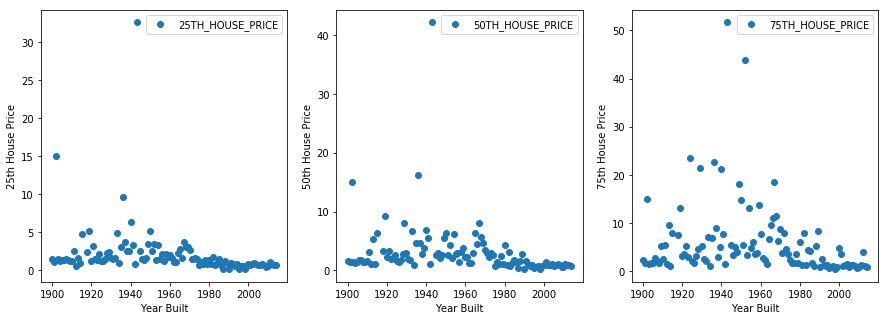

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)

plt.scatter(p25['YEAR_BUILT'],p25['25TH_HOUSE_PRICE'])
plt.xlabel("Year Built")
plt.ylabel("25th House Price")
plt.legend()

plt.subplot(1,3,2)

plt.scatter(p50['YEAR_BUILT'],p50['50TH_HOUSE_PRICE'])
plt.xlabel("Year Built")
plt.ylabel("50th House Price")
plt.legend()

plt.subplot(1,3,3)

plt.scatter(p75['YEAR_BUILT'],p75['75TH_HOUSE_PRICE'])
plt.xlabel("Year Built")
plt.ylabel("75th House Price")
plt.legend()

plt.show()

Please write down the **two** most interesting findings that you draw from the plot.

**Findings**
1. It's much easier to analyse house prices and their percentage out of total number of house prices.
2. 75% of the house prices fall below 51M. Most of 75% of house prices lies between 0.3 and 20M. And 
   And 25% of the house prices lie in between 0.3 and 5M.
   And 50% of the house prices lie betwen 0.3 and 10M.

### Task B. Correlation Coefficient

A correlation coefficient is a numerical measure of some type of correlation, meaning a statistical relationship between a pair of variables. 

In the following, please compute the Pearson's correlation as well as Spearman's rank correlation for three pairs of variables: <`25TH_HOUSE_PRICE`, `YEAR_BUILT`>, <`50TH_HOUSE_PRICE`, `YEAR_BUILT`>, and <`75TH_HOUSE_PRICE`, `YEAR_BUILT`>, and then print out your results. 

Note that it is OK to use this [function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to do this task, but make sure that you understand how the numbers are computed. 

In [13]:
print(p25.corr(method='pearson', min_periods=1))
print(p50.corr(method='pearson', min_periods=1))
print(p75.corr(method='pearson', min_periods=1))

print(p25.corr(method='spearman', min_periods=1))
print(p50.corr(method='spearman', min_periods=1))
print(p75.corr(method='spearman', min_periods=1))

                  YEAR_BUILT  25TH_HOUSE_PRICE
YEAR_BUILT          1.000000         -0.244533
25TH_HOUSE_PRICE   -0.244533          1.000000
                  YEAR_BUILT  50TH_HOUSE_PRICE
YEAR_BUILT          1.000000         -0.237504
50TH_HOUSE_PRICE   -0.237504          1.000000
                  YEAR_BUILT  75TH_HOUSE_PRICE
YEAR_BUILT          1.000000         -0.212677
75TH_HOUSE_PRICE   -0.212677          1.000000
                  YEAR_BUILT  25TH_HOUSE_PRICE
YEAR_BUILT          1.000000         -0.572112
25TH_HOUSE_PRICE   -0.572112          1.000000
                  YEAR_BUILT  50TH_HOUSE_PRICE
YEAR_BUILT          1.000000         -0.509847
50TH_HOUSE_PRICE   -0.509847          1.000000
                  YEAR_BUILT  75TH_HOUSE_PRICE
YEAR_BUILT          1.000000         -0.400442
75TH_HOUSE_PRICE   -0.400442          1.000000


Please write down the **two** most interesting findings that you draw from the result. 

**Findings**
1. Rearson: Pairs are somehow correlated linear. −1 is total negative linear correlation. 0 - there is no correlation. So we can conclude that there is a small negative correlation (around -0.24) between all different house prices and a year built meaning that if year increase than prices go a little bit down. Though there is no much linear correlation.
2. Spearman: Spearman's correlation assesses monotonic relationships (whether linear or not). Using Spearman rank we can see more clear that THERE is a negative correlation between two variables though it's not linear. Values are around -0.5. 
 The highest is a correlation between 25th of house prices and year built. Spearman coefficient is equal to -0.57. Therefore, we can conclude that 25% of prices that lie between 0.3 and 5M somehow decrease as years go by.

## Part 2. Hypothesis Testing

In many situations, we cannot get the full population but only a sample. If we derive an interesting result from a sample, how likely can we derive the same result from the entire population? In other words, we want to know whether this result is a true finding or it just happens in the sample by chance. Hypothesis testing aims to answer this fundamental question. 

### Task C. A/B Testing
> Acknowledgment: Thank [Greg Baker](http://www.cs.sfu.ca/~ggbaker/) for helping me to prepare this task.

A very common technique to evaluate changes in a user interface is A/B testing: show some users interface A, some interface B, and then look to see if one performs better than the other.

Suppose I started an A/B test on CourSys. Here are the two interfaces that I want to compare with. I want to know whether a good placeholder in the search box can attract more users to use the `search` feature.

<img src="img/ab-testing.png", width=800/>

The provided [searchlog.json](./searchlog.json) has information about users' usage. The question I was interested in: do people search more with the new design? (More precisely: is the number of searches per user different?)

To answer this question, we need to first pick up a **test statistic** to quantify how good an interface is. Here, we choose "the search_count mean". 

Please write the code to compute **the difference of the search_count means between interface A and Interface B.** 

In [14]:
import pandas as pd
import numpy as np
data = pd.read_json('searchlog.json', lines = True)

In [15]:
#u=data.groupby('search_ui')
#data1= u.mean()['search_count'].to_frame('search_count mean').reset_index()
#data.head(10)
#data

In [16]:
from scipy import stats

In [19]:
aa= data[data['search_ui'] == 'A']
a = aa['search_count']
bb= data[data['search_ui'] == 'B']
b = bb['search_count']
a = a.as_matrix()
b = b.as_matrix()

In [24]:
theta_hat = b.mean() - a.mean()

In [25]:
def run_permutation_test(pooled,sizeZ,sizeY,delta):
    np.random.shuffle(pooled)
    starZ = pooled[:sizeZ]
    starY = pooled[-sizeY:]
    return starZ.mean() - starY.mean()

In [26]:
pooled = np.hstack([a,b])

In [27]:
delta = b.mean() - a.mean()
delta

0.13500569535052287

In [28]:
numSamples = 10000
estimates = list(map(lambda x: run_permutation_test(pooled,a.size,b.size,delta),range(numSamples)))
#estimates

In [29]:
diffCount = len(np.where(estimates<= delta)[0])
diffCount

8774

In [30]:
numSamples

10000

In [31]:
p_value_ = 1.0 -(float(diffCount)/float(numSamples))

In [36]:
p_value_ 

0.12260000000000004

p -value > 0.01 => we **cannot** reject the null hypothesis, and, therefore, adopt the alternative explanation. => Therefore the difference in A/B search count mean is not statistically significant.
The difference in `search_count mean` between Interface A and Interface B is caused by random variation and **not** by the design differences between the two.

In [47]:
#Check
sigma_bar = np.sqrt((  np.sum((a-a.mean())**2) + np.sum((b-b.mean())**2) ) / (a.size + b.size - 2.0))
1.0 - stats.norm.cdf(theta_hat / (sigma_bar * np.sqrt((1.0/a.size)+(1.0/b.size))))

0.12363501800596111

In [48]:
#1.0 - stats.t.cdf(theta_hat / (sigma_bar * np.sqrt((1.0/a.size)+(1.0/b.size))),14)

Suppose we find that the mean value increased by 0.135. Then, we wonder whether this result is just caused by random variation. 

We define the Null Hypothesis as
 * The difference in search_count mean between Interface A and Interface B is caused by random variation. 
 
Then the next job is to check whether we can reject the null hypothesis or not. If it does, we can adopt the alternative explanation:
 * The difference in search_count mean  between Interface A and Interface B is caused by the design differences between the two.

We compute the p-value of the observed result. If p-value is low (e.g., <0.01), we can reject the null hypothesis, and adopt  the alternative explanation.  

Please implement a permutation test (numSamples = 10000) to compute the p-value. Note that you are NOT allowed to use an implementation in an existing library. You have to implement it by yourself.

Suppose we want to use the same dataset to do another A/B testing. We suspect that instructors are the ones who can get more useful information from the search feature, so perhaps non-instructors didn't touch the search feature because it was genuinely not relevant to them.

So we decide to repeat the above analysis looking only at instructors.

**Q. If using the same dataset to do this analysis, do you feel like we're p-hacking? If so, what can we do with it? **

**A.** Yes, we are doing p-hacking. We can keep doing analysis on the same data until we find something significant. For example, if we suspect that instructors are the ones who can get more useful information from the search features than we can filter data on instructors only and perform our analysis again without non-instructors to improve our p-value.


### Task D. Chi-squared test 

There are tens of different hypothesis testing methods. It's impossible to cover all of them in one week. Given that this is an important topic in statistics, I highly recommend using your free time to learn some other popular ones such as <a href="https://en.wikipedia.org/wiki/Chi-squared_test">Chi-Squired test</a>, <a href = "https://en.wikipedia.org/wiki/G-test">G-test</a>, <a href="https://en.wikipedia.org/wiki/Student%27s_t-test">T-test</a>, and <a href="https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test">Mann–Whitney U test</a>.

On the searchlog dataset, there are two categorical columns: `is_instructor` and `search_ui`. In Task D, your job is to first learn how a Chi-Squired test works by yourself and then use it to test whether `is_instructor` and `search_ui` are correlated. 

Please write code to compute the contingency table, the chi-squared stat, the degrees of freedom, and the p-value. Note that unlike Task C, you can call any function in an existing library. But, please make sure to understand how those functions are implemented. 

In [40]:
from scipy.stats import chisquare

In [41]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [42]:
data['is_instructor'] = data['is_instructor']
#data.head(3)

In [43]:
# Contingency table.
contingency = pd.crosstab(data['is_instructor'], data['search_ui'])
contingency

search_ui,A,B
is_instructor,,
False,233,213
True,115,120


In [44]:
# Chi-square test of independence: dof - degree of freedom, The expected frequencies, based on the marginal sums of the table.
chi2, p_value, dof, expected = chi2_contingency(contingency)

In [45]:
chi2, p_value, dof, expected

(0.54737123562158674,
 0.45939379957424897,
 1,
 array([[ 227.91189427,  218.08810573],
        [ 120.08810573,  114.91189427]]))

The null hypothesis **(H0)** is that the occurrence of these outcomes is statistically independent.
If the test statistic is soo small according to that chi-squared distribution and p -value >> 0.05 =>
We cannot reject the null hypothesis, and, therefore, adopt the alternative explanation.=>
The `is_instructor` and `the search_ui` are independent, are **not** correlated. 
Therefore the difference in A/B is not statistically significant.

## Submission

Complete Tasks A-D in this [notebook](https://github.com/sfu-db/bigdata-cmpt733/blob/master/Assignments/A8/A8.ipynb), and submit it to the CourSys activity Assignment 8.